In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfs = pd.read_excel('Brain QSAR-Copy1.xlsx', sheet_name='P07900')

In [2]:
result_df = dfs.drop_duplicates(subset=['Name'], keep='first')
result_df

,ID Set,Y(Obs),Y(Pred),Error,Name
0,1 train,-9.3169,-6.7378,2.5791,MolPort-001-946-845
1,2 train,-9.2916,-6.1428,3.1487,MolPort-002-510-038
2,3 train,-9.1011,-7.0208,2.0803,MolPort-019-937-484
3,4 train,-9.0975,-6.7625,2.3350,MolPort-003-846-713
4,5 test,-9.0600,-7.1508,1.9092,MolPort-003-939-101
...,...,...,...,...,...
4993,4994 train,0.4796,-1.7009 -,2.1805,MolPort-002-511-489
4994,4995 train,0.8024,-3.0419 -,3.8444,MolPort-000-165-323
4995,4996 test,1.0145,-0.9840 -,1.9984,MolPort-003-938-952
4996,4997 train,1.0326,-2.4832 -,3.5158,MolPort-021-804-685


In [3]:
df=result_df.drop(['Y(Pred)','Error','ID Set'],1)
df

C:\Users\arjun\AppData\Local\Temp/ipykernel_43756/1258630879.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=result_df.drop(['Y(Pred)','Error','ID Set'],1)


,Y(Obs),Name
0,-9.3169,MolPort-001-946-845
1,-9.2916,MolPort-002-510-038
2,-9.1011,MolPort-019-937-484
3,-9.0975,MolPort-003-846-713
4,-9.0600,MolPort-003-939-101
...,...,...
4993,0.4796,MolPort-002-511-489
4994,0.8024,MolPort-000-165-323
4995,1.0145,MolPort-003-938-952
4996,1.0326,MolPort-021-804-685


In [4]:
df_molportid = pd.read_excel('MolPortLigand-SMILES-Format-Copy1.xlsx')
df_molportid

,Sl. No.,Title,SMILES
0,1,MolPort-000-000-274,CC(=O)c1cc(OC)c(O)cc1
1,2,MolPort-000-000-274,CC(=O)c1cc(OC)c([O-])cc1
2,3,MolPort-000-000-941,COC(=O)[C@@H]([NH3+])C(C)C
3,4,MolPort-000-000-941,COC(=O)[C@@H](N)C(C)C
4,5,MolPort-000-002-651,CC1(C)C[C@@H]([C@H]12)C(=C)CC\C=C(\C)CC2
...,...,...,...
15092,15093,MolPort-044-831-091,OC[C@@H]1[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O1)O...
15093,15094,MolPort-044-831-092,C1OC(=O)/C=C(\C)CCO[C@@H]([C@H](C)O)/C=C/C=C\C...
15094,15095,MolPort-044-831-093,O1C[C@@]12[C@@]3(C)[C@]45[C@H](C=C(C([O-])=O)C...
15095,15096,MolPort-044-831-094,CC(C)(C1)CC[C@](C([O-])=O)(CC2)[C@@H]1C([C@@]2...


In [5]:
result_df2 = df_molportid.drop_duplicates(subset=['Title'], keep='first')
df2=result_df2.drop(['Sl. No.'],1)
df2['Name']=df2['Title']
df2=df2.drop(['Title'],1)

C:\Users\arjun\AppData\Local\Temp/ipykernel_43756/2808107958.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=result_df2.drop(['Sl. No.'],1)
C:\Users\arjun\AppData\Local\Temp/ipykernel_43756/2808107958.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df2.drop(['Title'],1)


In [6]:
df2

,SMILES,Name
0,CC(=O)c1cc(OC)c(O)cc1,MolPort-000-000-274
2,COC(=O)[C@@H]([NH3+])C(C)C,MolPort-000-000-941
4,CC1(C)C[C@@H]([C@H]12)C(=C)CC\C=C(\C)CC2,MolPort-000-002-651
5,OC[C@@H]1[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O1)O...,MolPort-000-002-994
6,c1cc(O)cc(c12)occ(c2=O)-c3ccc(O)cc3,MolPort-000-003-017
...,...,...
15090,c1cccc(c12)[C@H](O)C[C@H](O)[C@@H]2O,MolPort-044-831-090
15091,OC[C@@H]1[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O1)O...,MolPort-044-831-091
15093,C1OC(=O)/C=C(\C)CCO[C@@H]([C@H](C)O)/C=C/C=C\C...,MolPort-044-831-092
15094,O1C[C@@]12[C@@]3(C)[C@]45[C@H](C=C(C([O-])=O)C...,MolPort-044-831-093


In [7]:
df3=df.merge(df2[['Name','SMILES']])
df3

,Y(Obs),Name,SMILES
0,-9.3169,MolPort-001-946-845,Oc1cc(O)c2C(=O)C(C)(C)c(cc3O)c4c2c1C(=O)c5c(O)...
1,-9.2916,MolPort-002-510-038,[O-]C(=O)c1c(C)c(c([O-])c(C=O)c1O)OC(=O)c(c(O)...
2,-9.1011,MolPort-019-937-484,Oc1cc(O)cc(c12)O[C@@H]([C@H](C2)O)c3ccc(O)cc3
3,-9.0975,MolPort-003-846-713,[O-]C(=O)c1cc(c(O)c(c1)O)OC(=O)c2cc(O)c(O)c(c2)O
4,-9.0600,MolPort-003-939-101,Oc1cc(O)cc(c12)[o+]c(c(c2)O)-c3cc(O)c(O)cc3
...,...,...,...
4131,0.4796,MolPort-002-511-489,CC(=O)OCCCCCC\C=C\C=C/CC
4132,0.8024,MolPort-000-165-323,CCCCCCCCCCCC1=C([O-])C(=O)C=C(C1=O)O
4133,1.0145,MolPort-003-938-952,CCOC(=O)CCCCCCCCCCCCCCC
4134,1.0326,MolPort-021-804-685,C#CCCCCCCCCCCCC(=O)C[C@H](O)CO


In [8]:
df3.to_csv('Proccesed_Brain_P07900.csv')  ##final processed dataset

### Mol_descriptors (Ignore from here)

In [10]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # adding the hydrogens to molecule obj
        mol=Chem.AddHs(mol)
        # Calculating all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

Mol_descriptors,desc_names = RDkit_descriptors(df3['SMILES'])

In [11]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors['SMILES']=df3['SMILES']


In [12]:
df_with_200_descriptors['Y(Obs)']=df3['Y(Obs)']

In [13]:
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SMILES,Y(Obs)
0,14.385909,-3.891730,14.385909,0.753387,0.372312,376.364,360.236,376.094688,140,0,...,0,0,0,0,0,0,0,0,Oc1cc(O)c2C(=O)C(C)(C)c(cc3O)c4c2c1C(=O)c5c(O)...,-9.3169
1,13.363196,-3.794836,13.363196,1.587135,0.316878,417.302,404.198,417.047432,158,0,...,0,0,0,0,0,0,0,0,[O-]C(=O)c1c(C)c(c([O-])c(C=O)c1O)OC(=O)c(c(O)...,-9.2916
2,8.815304,-3.573098,8.815304,0.848375,0.636810,274.272,260.160,274.084124,104,0,...,0,0,0,0,0,0,0,0,Oc1cc(O)cc(c12)O[C@@H]([C@H](C2)O)c3ccc(O)cc3,-9.1011
3,12.696558,-2.096090,12.696558,0.860555,0.291766,321.217,312.145,321.025205,120,0,...,0,0,0,0,0,0,0,0,[O-]C(=O)c1cc(c(O)c(c1)O)OC(=O)c2cc(O)c(O)c(c2)O,-9.0975
4,8.351308,-0.790165,8.351308,0.463857,0.347287,287.247,276.159,287.055014,106,0,...,0,0,0,0,0,0,0,0,Oc1cc(O)cc(c12)[o+]c(c(c2)O)-c3cc(O)c(O)cc3,-9.0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,11.582583,-4.581038,11.582583,1.738322,0.335703,224.344,200.152,224.177630,92,0,...,0,0,0,0,0,0,0,0,CC(=O)OCCCCCC\C=C\C=C/CC,0.4796
4132,12.649061,-4.974874,12.649061,1.590541,0.495659,293.383,268.183,293.175833,118,0,...,0,0,0,0,0,0,0,0,CCCCCCCCCCCC1=C([O-])C(=O)C=C(C1=O)O,0.8024
4133,12.505954,-5.236808,12.505954,2.889430,0.270900,284.484,248.196,284.271530,120,0,...,0,0,0,0,0,0,0,0,CCOC(=O)CCCCCCCCCCCCCCC,1.0145
4134,13.091752,-5.086632,13.091752,1.135907,0.379753,282.424,252.184,282.219495,116,0,...,0,1,0,0,0,0,0,0,C#CCCCCCCCCCCCC(=O)C[C@H](O)CO,1.0326


In [14]:
df_with_200_descriptors.corr()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Y(Obs)
MaxEStateIndex,1.000000,-0.241403,1.000000,-0.013043,-0.137330,0.431884,0.437032,0.431873,0.422440,NaN,...,0.025534,NaN,0.006541,NaN,0.011095,NaN,-0.055541,NaN,-0.000096,0.012821
MinEStateIndex,-0.241403,1.000000,-0.241403,-0.573725,0.246495,-0.503202,-0.462012,-0.503250,-0.559336,NaN,...,-0.044275,NaN,-0.013083,NaN,-0.007075,NaN,0.056188,NaN,0.017629,-0.249535
MaxAbsEStateIndex,1.000000,-0.241403,1.000000,-0.013043,-0.137330,0.431884,0.437032,0.431873,0.422440,NaN,...,0.025534,NaN,0.006541,NaN,0.011095,NaN,-0.055541,NaN,-0.000096,0.012821
MinAbsEStateIndex,-0.013043,-0.573725,-0.013043,1.000000,-0.192908,0.077955,0.040027,0.077994,0.141100,NaN,...,-0.005342,NaN,-0.002114,NaN,-0.022133,NaN,-0.058930,NaN,-0.044375,0.210392
qed,-0.137330,0.246495,-0.137330,-0.192908,1.000000,-0.483285,-0.485134,-0.483395,-0.490207,NaN,...,-0.018262,NaN,-0.013821,NaN,0.022614,NaN,0.024909,NaN,-0.012748,-0.165592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiocyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_thiophene,-0.055541,0.056188,-0.055541,-0.058930,0.024909,-0.023787,-0.021257,-0.023870,-0.037758,NaN,...,-0.000913,NaN,-0.000646,NaN,-0.000646,NaN,1.000000,NaN,-0.002073,0.004431
fr_unbrch_alkane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_urea,-0.000096,0.017629,-0.000096,-0.044375,-0.012748,-0.033707,-0.032658,-0.033698,-0.034302,NaN,...,-0.001098,NaN,-0.000776,NaN,-0.000776,NaN,-0.002073,NaN,1.000000,-0.001667


In [15]:
df_with_200_descriptors.corr()['Y(Obs)']

MaxEStateIndex       0.012821
MinEStateIndex      -0.249535
MaxAbsEStateIndex    0.012821
MinAbsEStateIndex    0.210392
qed                 -0.165592
                       ...   
fr_thiocyan               NaN
fr_thiophene         0.004431
fr_unbrch_alkane          NaN
fr_urea             -0.001667
Y(Obs)               1.000000
Name: Y(Obs), Length: 209, dtype: float64

In [16]:
corr_mat = df_with_200_descriptors.corr(method='pearson')

In [20]:
x= pd.DataFrame(corr_mat['Y(Obs)'].sort_values()[0:10])

In [21]:
x

,Y(Obs)
BCUT2D_MWHI,-0.264318
VSA_EState7,-0.262603
BCUT2D_MRHI,-0.262440
MinEStateIndex,-0.249535
VSA_EState8,-0.245179
BCUT2D_LOGPHI,-0.230212
BCUT2D_CHGHI,-0.211934
BCUT2D_CHGLO,-0.178919
qed,-0.165592
NumAromaticRings,-0.162594


In [30]:
df2 = df_with_200_descriptors[['MolWt', 'TPSA', 'NumRotatableBonds', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'MolLogP','BCUT2D_MWHI','VSA_EState7','Y(Obs)']].copy()

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


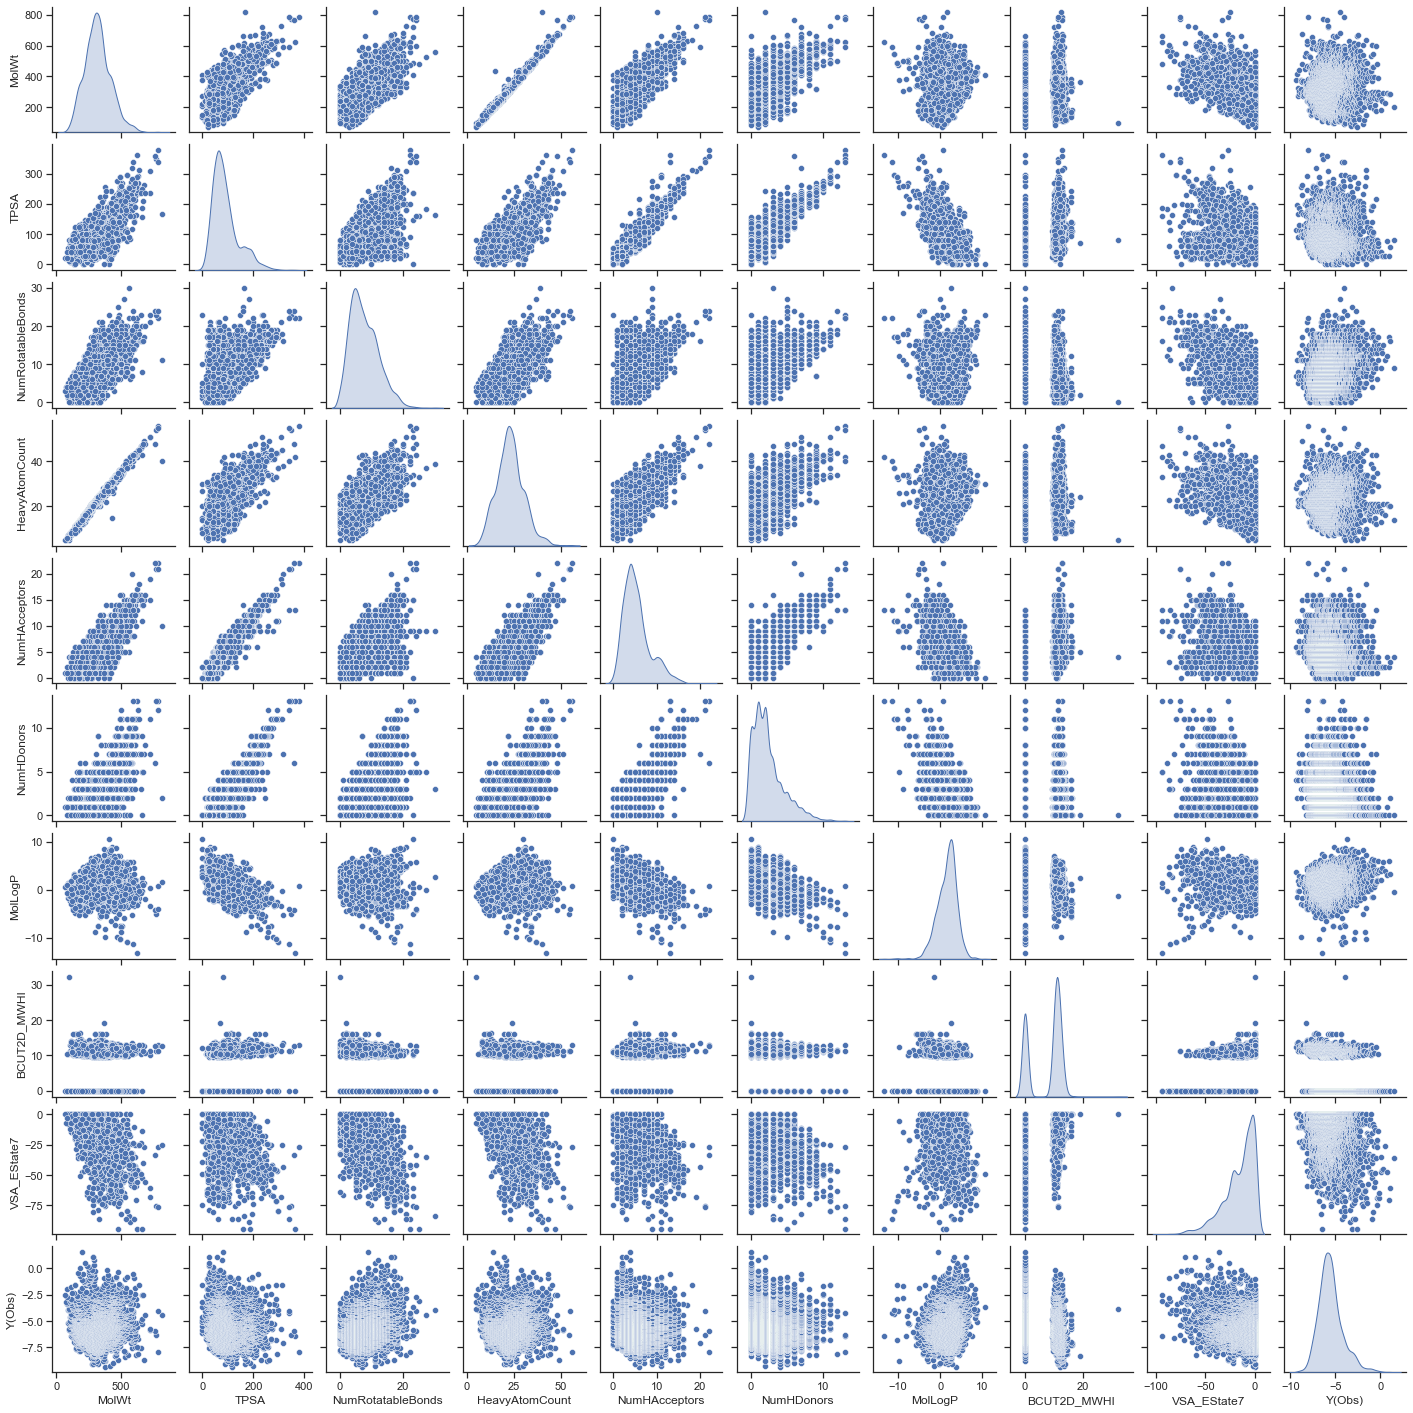

In [36]:
sns.set(style="ticks")
sns.pairplot(df2, diag_kind='kde', markers='o', height=2)
plt.show()